In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from import_file import *
load_libs()
# set_chinese_font()

# 1. Data Wrangling

In [2]:
data = []
for year in range(2008,2018):
    file = "./data/cn/movie_%s.json" % year
    with open(file, encoding='utf-8' ) as data_file:    
        data += json.load(data_file)

In [3]:
df = pd.DataFrame(data)
df.describe()

,1_star,2_star,3_star,4_star,5_star,imdb_id,img_url,rating,ratings_num,title,url,year
count,2458,2458,2458,2458,2458,2458,2458,2458,2458,2458,2458,2458
unique,724,413,581,511,371,1732,2436,72,2205,2433,2433,24
top,0.4%,25.9%,0.0%,0.0%,3.2%,,https://img3.doubanio.com/view/movie_poster_co...,5.9,57,龟兔再跑,https://movie.douban.com/subject/26263844/,2015
freq,49,16,15,65,39,709,2,61,5,2,2,346


In [4]:
df.head()

,1_star,2_star,3_star,4_star,5_star,imdb_id,img_url,rating,ratings_num,title,url,year
0,2.2%,24.4%,46.7%,17.8%,8.9%,tt0904013,https://img3.doubanio.com/view/movie_poster_co...,6.1,59,笨裁妙判 糊涂神判,https://movie.douban.com/subject/2596658/,2007
1,4.1%,18.4%,56.8%,17.1%,3.6%,tt1151318,https://img3.doubanio.com/view/movie_poster_co...,6.0,8730,错爱 塚愛,https://movie.douban.com/subject/2361528/,2007
2,6.4%,23.0%,49.1%,17.5%,4.1%,tt1606322,https://img3.doubanio.com/view/movie_poster_co...,5.8,2618,救我,https://movie.douban.com/subject/5155783/,2008
3,6.6%,10.1%,53.0%,21.7%,8.6%,,https://img1.doubanio.com/view/movie_poster_co...,6.3,291,欣月童话,https://movie.douban.com/subject/2277015/,2008
4,2.3%,11.2%,47.4%,31.6%,7.5%,tt0491044,https://img1.doubanio.com/view/movie_poster_co...,6.6,34533,文雀,https://movie.douban.com/subject/2976123/,2008


In [5]:
df.drop_duplicates('title', inplace=True)
df['rating'] = df['rating'].astype(float)
df['ratings_num'] = df['ratings_num'].astype(int)
df['year'] = df['year'].astype(int)
df['1_star'] = df['1_star'].apply(lambda x: float(x.strip('%'))/100)
df['2_star'] = df['2_star'].apply(lambda x: float(x.strip('%'))/100)
df['3_star'] = df['3_star'].apply(lambda x: float(x.strip('%'))/100)
df['4_star'] = df['4_star'].apply(lambda x: float(x.strip('%'))/100)
df['5_star'] = df['5_star'].apply(lambda x: float(x.strip('%'))/100)

df.rename(columns={'title': 'name', 'rating': 'db_rating', 'ratings_num': 'db_ratings_count',   
                   'url': 'douban_url', 'img_url':'image_url', 'imdb_id': 'movie_tt_id'}, inplace=True)

In [6]:
def name_to_rating(name):
    return {
        '1_star': 2,
        '2_star': 4,
        '3_star': 6,
        '4_star': 8,
        '5_star': 10,
    }[name]

df['mode']=df[['1_star', '2_star','3_star','4_star','5_star']].idxmax(axis=1)
df['mode']=df['mode'].apply(lambda x: name_to_rating(x))

In [7]:
df['std']=(df['1_star']*(2-df['db_rating'])**2+df['2_star']*(4-df['db_rating'])**2+df['3_star']*(6-df['db_rating'])**2+ \
df['4_star']*(8-df['db_rating'])**2+df['5_star']*(10-df['db_rating'])**2)**0.5

# Deviation against mode
df['std2']=(df['1_star']*(2-df['mode'])**2+df['2_star']*(4-df['mode'])**2+df['3_star']*(6-df['mode'])**2+ \
df['4_star']*(8-df['mode'])**2+df['5_star']*(10-df['mode'])**2)**0.5

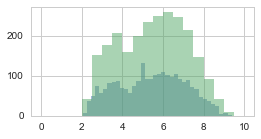

In [8]:
bins=linspace(0,10)
df['db_rating'].hist(bins=bins, alpha=0.5)

bins=arange(0,10,0.5)
df['db_rating'].hist(bins=bins, alpha=0.5, figsize=(4,2))

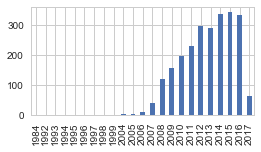

In [9]:
df['year'].value_counts().sort_index().plot(kind = 'bar', figsize=(4,2))

# 2. General Movies

In [10]:
df = df.query("db_ratings_count > 5000")
df.describe()

,1_star,2_star,3_star,4_star,5_star,db_rating,db_ratings_count,year,mode,std,std2
count,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000
mean,0.093861,0.154571,0.371225,0.263219,0.117136,6.309984,69950.924920,2012.265176,6.202875,1.769877,1.935577
std,0.145390,0.113982,0.133203,0.149737,0.115542,1.327754,84461.028344,3.101012,1.806036,0.239902,0.388636
min,0.001000,0.003000,0.012000,0.004000,0.008000,2.300000,5005.000000,1984.000000,2.000000,1.206715,1.303840
25%,0.010000,0.050000,0.274000,0.131000,0.039000,5.400000,14277.250000,2010.000000,6.000000,1.605397,1.697940
50%,0.029000,0.131000,0.394000,0.256000,0.074000,6.400000,38099.500000,2012.500000,6.000000,1.736030,1.852026
75%,0.101250,0.248250,0.482000,0.403000,0.153000,7.300000,92985.250000,2015.000000,8.000000,1.891983,2.046216
max,0.942000,0.424000,0.619000,0.582000,0.676000,9.200000,709045.000000,2017.000000,10.000000,3.397793,5.154028


## 2.1 Overview

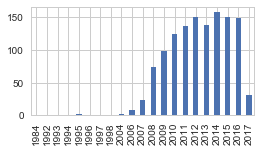

In [11]:
df['year'].value_counts().sort_index().plot(kind = 'bar', figsize=(4,2))

In [12]:
df['std'].hist(bins=20, alpha=0.5, figsize=(4,2))
plt_configure(title='STD distribution')

plt.figure()
bins=arange(0,10.5,0.5)
df['db_rating'].hist(bins=bins, alpha=0.5, figsize=(4,2))
plt_configure(title='Rating distribution')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAQsAAACZCAYAAAA4jB+uAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEWBJREFUeJzt3XtMU+cfBvCngBUsOHRXUVFR0CEoDKPD/QRRXJ2XeceA
w00SjUxFxDhAxEskojLZEFGHF0wgxjG8TN2cESUydeDWKToJ05GFiBAnXjZaHIic3x/GjgqUt1ja
Ks8nMbHnPec9377C43turUySJAlERK2wMncBRPRiYFgQkRCGBREJYVgQkRCGBREJYVgQkRCGhQnU
19cjPT0dSqUSHh4e8PX1RVRUFMrKygAA5eXlGDhwoN4/ABATE6OzzMPDA2PGjEFSUhIePnxoUE0R
ERGIiYkBABw6dAgjRowQ2q6kpAQFBQUtthcWFmLgwIHQaDQAgIEDByIvL8+g2horLy9Hbm6u9vWY
MWOQlZXV5v6o7WzMXUBHkJycjNzcXMTFxaF///64d+8e0tLSMGfOHHz//ffo0aMHzp07p10/Pj4e
tra2iIuLa9JXQEAA1q9fDwD4999/UVJSgsTERFy/fh3p6emQyWQG1zdhwgT4+/sLrfvpp58iLCwM
7777brPt3t7eOHfuHLp06WJwHc2JjY2Fh4cHAgMDAQA5OTmws7MzSt9kGIaFCRw8eBArV67U/kL2
6tULX375JUaOHInc3FxMnz4dr7/+unZ9uVwOW1tbnWWN2xov7927N3r37o1p06bhzJkzGDt2rMH1
2drawtbWtg3vrKln6zO27t27t1vfpB8PQ0xAJpOhoKAA9fX12mV2dnY4cuQIxo0b99z9Dxo0CD4+
Pjh58mSL6zzd19ChQxEbG4u6ujpt27OHIWlpafD394enpyemTp2Ks2fPAgBCQ0Nx69YtrF+/HqGh
odrDp+3bt2P48OGYP39+k8MQALhy5QomT54MT09PhIaGorS0VNv27GFK4+1jYmJw8eJF7N27F2PG
jAGgexgiSRKysrKgVCrh6emJKVOmaGsFnhy2rV27FjExMfD29oavry/S0tLaOswdHsPCBMLCwnDo
0CH4+/sjJiYGhw8fRlVVFfr06QMHBwej7MPV1RV//PFHs20FBQWIi4vDvHnzcPjwYTg4OLR4HiE3
Nxd79uxBYmIiTpw4AX9/f0RGRkKtViM1NRVvvfUWoqKikJqaqt0mPz8f2dnZ+Oyzz5rtMzMzE4sW
LcKhQ4egUCiwePFiNDQ0tPqe4uLi4O3tjeDgYOTk5DRpT09PR0pKCiIiInD06FEEBgYiPDwcJSUl
2nVycnLg5OSEb7/9FvPmzcPWrVtRXFzc6r6pKYaFCSxYsABbt26Fq6srjh8/jpiYGPj5+WH9+vV4
/PixUfbRtWtXqNXqZtsOHDiAsWPHIiQkBC4uLoiNjYWLi0uz65aXl6NTp05wcnJCr169sGjRIqSm
psLGxgaOjo6wtraGQqGAo6Ojdpu5c+eib9++cHV1bbbP+fPnY/z48XB1dcWGDRtw8+ZNvSdJn3Jw
cECnTp1gZ2fX5PBDkiRkZGRg4cKFmDhxIvr164clS5Zg5MiR2LVrl3Y9Z2dnREREwNnZGQsWLICj
oyOuXr3a6r6pKYaFiSiVSuzbtw+FhYXYuXMnxo0bh6ysLOzZs8co/Ws0Gtjb2zfbduPGDQwePFj7
WiaTwdPTs9l1J0+ejG7dukGpVGLatGnYsWMH+vbtq/ecRq9evfTWNnToUO3fu3fvjp49e+L69et6
t2nNvXv3cP/+fXh5eeks9/Hx0ZlhOTs767QrFAqdw0ESx7BoZyUlJdqrF8CTH9aAgACkpKRgwoQJ
+PHHH42yn+LiYgwaNKjZNplMhmcfLu7UqVOz67766qv47rvvkJGRgeHDh+PYsWOYOnWqztT+Wa2d
HLW2ttZ53dDQ0OL+RWdanTt3bnZ5Q0ODziGOXC5vsg4ftG4bhkU7a2hoQFZWFi5evNikzd7eHt26
dXvufdy4cQO//vorPvjgg2bb3dzcUFRUpLOspeP2s2fPIjMzEyNHjkRsbCx++OEHODg4ID8/v831
NQ6a27dvo6KiAgMGDADwJLQanwy9efOmUJ/29vZ44403cOnSJZ3lly5davEQi54PL522M3d3d7z/
/vtYunQpoqKiMGLECGg0Gly4cAHHjh1DRkaGQf3V1dXhzp07AIDa2loUFxcjKSkJAQEBGDVqVLPb
zJ07F3PmzEFGRgZGjx6NI0eOoKSkRHuzV2OSJGHLli147bXX4O3tjaKiIty5c0d72KJQKFBaWoq7
d+8K17xt2zY4OTmhZ8+eSExMxODBg7VXXzw9PbF//368/fbb+Ouvv7B3716dbRUKBcrKynD79m28
+eabOm1PzwU5OTnB3d0dx48fx/nz55GZmSlcG4ljWJjAli1bsHv3buzbtw8JCQmwsrLC0KFDsXv3
bnh7exvUV15eHv73v/8BALp06YKePXti1qxZ+OSTT1rcxsvLCykpKdiyZQu++OIL+Pn5YeLEic2u
O3r0aERHRyMlJQWVlZXo0aMH4uPj4evrC+BJ8GzcuBGXLl3Ctm3bhGoODw/H5s2bUVlZCV9fX2ze
vFnbtnr1asTHx2PKlCkYMGAAli9fjiVLlmjbg4ODER0djQ8//BA//fSTTr8fffQRampqsHnzZty9
exdubm7YuXMnhg0bJlQXGUbGT8oiIhE8Z0FEQhgWRCTErOcsVCqVOXdP1KH5+PgYtL7ZT3AaWnB7
U6lUFleTqBe1dtZtem35j5qHIUQkhGFBREIYFkQkxOznLCzd/pMtPxPRWIiy+ecyiF4WnFkQkRCG
BREJYVgQkRCGBREJYVgQkRCGBREJ4aVTI+ElVnrZcWZBREIYFkQkhGFBREIYFkQkhGFBREIYFkQk
hJdOTYyXWOlFxZkFEQlhWBCREIYFEQlhWBCREIYFEQlhWBCREIYFEQlhWBCREL03ZT169AgrV67E
rVu3UFdXh/DwcAwYMAAxMTGQyWRwdXXFmjVrYGVlhezsbBw4cAA2NjYIDw9HQECAqd4DEZmA3rA4
evQoHB0dkZSUhAcPHmDq1KkYNGgQIiMjMWLECKxevRqnT5+Gl5cXMjMzcfDgQdTW1iIkJATvvfce
5HK5qd4HEbUzvWExfvx4KJVKAIAkSbC2tsa1a9cwfPhwAICfnx/Onz8PKysreHt7Qy6XQy6Xw9nZ
GSUlJRgyZEj7vwMiMgm9YaFQKAAAarUaERERiIyMxKZNmyCTybTt1dXVUKvVcHBw0NlOrVYLFdCW
b3Nub41rqqj420w1aNq4neWNpwjWbflafZCssrISixYtQkhICCZPnoykpCRtm0ajQdeuXWFvbw+N
RqOzvHF46GNpX1mvUql0avq9SuzBL2Pz8TH8QbJna39RsG7Ta0vI6b0aUlVVhbCwMKxYsQIzZ84E
ALi7u6OwsBAAkJ+fj2HDhmHIkCFQqVSora1FdXU1SktL4ebm1oa3QESWSu/MYufOnfjnn3+wfft2
bN++HQAQFxeHhIQEJCcnw8XFBUqlEtbW1ggNDUVISAgkScKyZcvQuXNnk7wBIjINvWGxatUqrFq1
qsnyrKysJsuCgoIQFBRkvMqIyKLwpiwiEsKwICIhDAsiEsKwICIhDAsiEsKwICIhDAsiEsKwICIh
DAsiEsKwICIhDAsiEsKwICIhDAsiEsJvUbdQ/LZ1sjScWRCREIYFEQlhWBCREIYFEQlhWBCREIYF
EQlhWBCREIYFEQlhWBCREIYFEQnpsLd7t3Q7dUXF32b7flMiS8aZBREJYVgQkRCGBREJYVgQkRCG
BREJYVgQkRChsCgqKkJoaCgAoKysDMHBwQgJCcGaNWvQ0NAAAMjOzsb06dMRFBSEvLy89quYiMyi
1bDYtWsXVq1

## 2.2 standard deviation

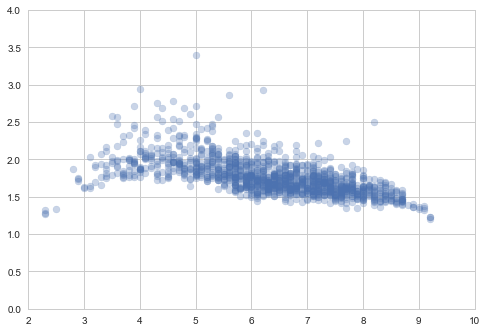

In [13]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(df.db_rating, df['std'], alpha=0.3)
ax.axis([2,10,0,4])
plt.show()
turn_scatter_into_interactive(fig, scatter_plot, df, 'D:/movie_output/all.html', show_ratings_num=False, show_distribution=True)

In [14]:
movie_list(df.sort_values(by='std',ascending=False))

## 2.3 Ratings Number Comparison (Converge)

In [15]:
for num in [0, 5000, 20000, 50000, 100000, 200000]:
    sub_df = df.query("db_ratings_count > @num")
    fig, ax = plt.subplots()
    scatter_plot = ax.scatter(sub_df.db_rating, sub_df['std'], alpha=0.3)
    ax.axis([2,10,1,4])
    plt_configure(title = num, figsize=(2.5,2.5))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAALQAAAC4CAYAAABKD8ZJAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztvWmQXOV5t389z1l6n55Vox0hCWHHjgnGrx3+ZUdAXMEu
229IRAwoBUmZD8TB5UDFGEwREuxUUcpiZ6lgwKkUVQTHMZhy8BtXUk7gtePXREbYIWZxMEJISJoZ
zUzv3Wd/nv+H09Oa0TIzWmZ6pjnXF1Cfme5brV8/fZ97FVprTUJCjyC7bUBCwvkkEXRCT5EIOqGn
SASd0FMkgk7oKRJBJ/QUiaC7QBAEfP7zn+d973sf73vf+/iTP/kToijqtlk9gdltA96KfPGLX+T7
3/8+Dz30EK1Wi89+9rPk83l+93d/t9umrX50wrLiuq6+5JJL9L/92791HnvyySf15ZdfrqMo6qJl
vUHiciwzr7zyCo7j8N73vrfz2Hve8x6mp6c5dOhQFy3rDRJBLzMTExNkMhkKhULnsZGREQDGx8e7
ZVbPkAh6mXEch1QqNecx27YB8H2/Gyb1FImgl5l0On2ScGf+nMlkumFST5EIeplZu3YtrVaLRqPR
eWxychKA0dHRbpnVMySCXmbe9ra3kclkeP755zuP7du3j+HhYTZv3txFy3qDRNDLTDqd5tprr+Xz
n/88zz//PM8++yx//ud/zk033dRt03oCoXVS4L/ceJ7HH//xH/Ptb38b27b5tV/7NT7zmc8gZXK+
nCuJoBN6iuRISOgpEkEn9BSJoBN6ikUJenp6mp07d7J///45jz/99NPs2rWL6667jq9//etLYmBC
wpmwYPloEATce++9pNPpkx6///77eeKJJ8hkMtxwww1cddVVDA8PL5mxCQkLseAJvWfPHq6//nrW
rFkz5/H9+/ezefNmisUitm1z2WWX8dxzzy2ZoQkJi2HeE/rJJ59kcHCQD3zgAzz88MNzrjUajTkV
Y7lcbk4693TMzpAlJCyGyy67bNE/O6+gv/GNbyCE4Nlnn+WVV17hzjvv5Mtf/jIjIyPk83mazWbn
Z5vN5hyBny8Dl5Lnn38+seUUrDRbzoR5Bf3YY491/v/GG2/kj/7ojzq1u9u2bePgwYNUKhWy2Sz7
9u3j5ptvPguTExLOH2fcU/itb32LVqvFddddx1133cXNN9+M1ppdu3Yl1WIJXWfRgn700UeB+GSe
4aqrruKqq646/1YlJJwlSWIloadIBJ3QUySCTugpEkEn9BSJoBN6ikTQCT1FIuiEniIRdEJPkQg6
oadIBJ3QUySCTugpEkEn9BSJoBN6ikTQCT3FguWjURRxzz33cODAAYQQ3HfffezYsaNz/ZFHHuHx
xx9ncHAQgPvuu4+tW7cuncUJCfOwoKCfeeYZAL72ta+xd+9evvSlL/HlL3+5c/3FF19kz549vPOd
71w6KxMSFsmCgv7gBz/IFVdcAcDRo0fp6+ubc/2ll17i4YcfZnJykiuuuIJbbrllSQxNSFgMi+pY
MU2TO++8k+985zv81V/91ZxrH/nIR9i9ezf5fJ5PfepTPPPMM1x55ZVLYmxCwkKc0fTRyclJPv7x
j/PP//zPZLNZtNZzxhk89thjVCoVbr311tM+R6+NMVBKEyqNKQVSim6b05OctzEGAN/85jeZmJjg
lltuIZPJIITozDFuNBp89KMf5dvf/jbZbJa9e/eya9eu82rgUnIu7fpaa/YfqTBZdggjDYZgZCDD
tg39CHHmwl5powNWki1nwoKC/pVf+RU+97nP8Zu/+ZuEYcjdd9/Nd77znU7n9+23385NN92Ebdtc
fvnl7Ny586yNX03sP1JhquxiSInRDn5OlV2gwvaNA1217a3MgoLOZrP85V/+5WmvX3PNNVxzzTXn
1aiVTqQ0k2UH44SJ+1IKJssOF67vx0jcj66QJFbOgiCIYjfjFISRJgiSRfTdIhH0WWBZBqZx6hPY
NASWZSyzRQkzJII+CwwZ3wAqNfeUVkozMpBJ3I0ukgj6LNm2oZ/hgTSRUnhBRKQUwwNptm3o77Zp
b2nOeLZdQowQgu0bB7hwfT9BEGFZRnIyrwASQZ8jhhQYqeRtXCkkLkdCT5EIOqGnSASd0FMkgk7o
KRJBJ/QUiaATeopE0Ak9RSLohJ4iEXRCT7GgoKMo4nOf+xzXX389N9xwA6+++uqc68kC+4SVxIKC
nj3G4LbbbuNLX/pS59rMAvu/+7u/49FHH+Uf//EfmZqaWjprExIWYEFBf/CDH+QLX/gCcPIYg9W8
wD5SGj9URGrRPcIJq4BzGmOwGhfYa60ZKwVUWxGR0uwf+38UswbrBq2zam49nzz//PMrpot8tXbn
L7pMbM+ePXzmM5+ZM8bgbBfYd7Oj+LXDZcKUy6gUvPbaa2zfvh2lNP0D6a42t+7bt4/+tdvOWxf5
ubCau74XdDm++c1v8tBDDwGcNMZg9gJ73/fZt28fl1566VmYvTzMNLeeePLNNLd20/0YKwWdLvKU
ZWBIyVTZZf+RStdsWo2c8xiD1bTAfqa51TjFx3imuXWpapsjpU/bCBApTbUVMXqaD1rSRb54znmM
wWpaYN+N5tYTB9KYp3AlgiA67bfDUn/Qeo23VGKlG82tswfSnM6VmK99K+kiPzPeUoKGuc2tQaQX
1dwaKY3rhWfsYy/WZzekoJg1ki7y88Bb7ntsdnMrrSO89x3rTiuYxbgL83EmPvu6QYv+gfQpXyth
8bzlBD2DIQW2KeeI+cQbt3OdX3cmPnvSRX5+eMsJerZoZzjVSTxUTDNdcTCMuf7riZGH+aIXMz77
VNmd43bM50okXeTnxlvmnTuVaKemfd7dfnz2SRxpzaHxOqWaw5Z1c7/yldK03BDHDRgvNRd0R2KX
4dRuS8L55y0j6FO5D9VWyKtvlilV48e11oxNN6k1fcJQMTbVwDIN1g/nARibblFreASRolJ3EVKw
YThPyoqf8FTuSOJKLC9viSjHaaMNQjA+1cIPFEBHzFIIbMsgk7YoVV3GppuxmJseCBjoS9F0Qhqt
gLHp46n/+TKOhhSkU2Yi5iXmLSHo+cbfIgA0kdYdMc8w1JdmoC9DueYwVW0B0JezGSlmiJRGCkGt
6RPN2uqRjNPtLm8Jl2O+aINtSoaKacanWkSRRprxzymtKRbSrB/OUchZqEjRV0hjCIFSGiEhDBUK
TRQqjPZNZpII6S49KegTIw+njTZo3blB08DrRysEocKQgr58inVDWQCyKRMEGEKgtWa81KRa82g4
AULCQCHF+uE8WpMkQrpMTwn6xEiGFNDfl+LizYOnjDYUs2YnKnHx5kG00hw+1iCbsjDN2BtTSjPa
FvZU2WW8FPvZg8V0/JoIyjUPDbxr+3AnejFfOC9h6egpQc9EMqQQTFcdag2PMFL8z8FyR2yzow3/
5Y8h2qfu/iMVyjWXct3l8LE6uYzNhpEcawazbFlXJAgiglDx04PTaB2f+hesLzI6EPvTQhBnH4lr
rs82u5hwbvSMoGcv8jk61aTW9JBSYEuDRitgouQAsH3jwEmJi05IzzC4YG2RIFI4bkB/IQXAcy+P
44eKIIhI2SYbR/JYptFxXwwDvCAiCCIOT9aT7VhdpGcEPRPJEGhqDW+OrxxFGt0W/Im1xbM/CHEc
Oo41R0rzk/2TbBotYBqSWjOIY9PTDZqtgJ/fPjzn9U1DIA3ZU9uxVqPbNK+ggyDg7rvv5siRI/i+
zyc/+Ul++Zd/uXP9kUce4fHHH2dwcBCA++67j61bty6txadhJpIRRnHjq5QCpTUqiiMShikJ26fs
7BN6dgHRTKxZSgECmk7EwbE6hiEZLmawLYNCNsWxcosjUw02jhSItCbwI0aHs6hIxeFB0Y58mBKj
7WasprpmrfW

## 2.4 Time Shift

In [16]:
for year in range(2008,2017):
    sub_df = df.query("year == @year")
    fig, ax = plt.subplots()
    scatter_plot = ax.scatter(sub_df.db_rating, sub_df['std'], alpha=0.3)
    ax.axis([2,10,1,4])
    plt_configure(title=year, figsize=(2.5,2.5))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAALQAAAC4CAYAAABKD8ZJAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAHTJJREFUeJztnXmQFdXZ/z+nu+8+OzMMWyCA4TV5zRsNRqRQQTTRlKYC
QgTGwqTkD2KwFCsSlBCiwRRiUho3REylsFBjRC0DiWXKRMss5CUOP18iI3EZkWUGZr2z3L2X8/vj
zlznMsPsa8/5VFEwfW73fXr49ulznuc8zxFSSolC4RK0kTZAoRhMlKAVrkIJWuEqlKAVrkIJWuEq
lKAVrkIJehA4c+YMt99+O/PmzWPBggXcc889NDc3A2CaJj/72c+YN28e8+bN48EHH8S27cy5PbVH
IhE2bdrEpZdeyqWXXsrGjRsJh8PDfo9jBqkYEJZlyaVLl8pbbrlFHj16VB4+fFguXbpUrl27Vkop
5QMPPCC//vWvy3fffVf+4x//kAsWLJBPPPFE5vye2u+66y65fPlyWVFRIY8cOSKXLl0qf/CDHwz7
fY4VlKAHyHvvvSfnzJkja2trM8fKy8szx77yla/IP//5z5m2V155Rc6fP1/ati0TiUS37VJK+dWv
flXu378/075v3z554YUXDsOdjU3UkGOATJ06laeffpqSkpLMMSEEAFVVVcTjcS655JJM28UXX0xD
QwMnTpzg6NGj3bYDFBYWsn//flpbW4lEIvzhD3/gggsuGKa7G3soQQ+QwsJCrrjiiqxju3fvZsaM
GdTU1BAIBMjNzc20tQv/zJkzPbYDbN26lYqKCr72ta9x8cUX88knn/DQQw8N9W2NWZSgB5ldu3bx
xhtv8OMf/5h4PI7P58tq93q9AKRSqR7bAT755BNmzpzJM888wzPPPENubi4bNmxAqiU4XWKMtAFu
4oknnuDRRx9ly5YtLFy4kNdffz0jzHbafw4EAvj9/m7bT5w4wf3338/rr7/OjBkzAHjssce46qqr
+Ne//sW8efOG4a7GFqqHHiR+/vOf89hjj3Hvvfdy0003ATBp0iRisRiRSCTzubq6OgBKS0t7bD9y
5Ah+vz8jZkiP2QsLCzl58uRw3NaYQwl6EHjkkUd49tln2bZtG6tWrcocP//88wkEAhw6dChzrLy8
nOLiYqZPn95je2lpKbFYjFOnTmXa6+vraWpqYvr06cNzc2ONkXazjHUqKirk+eefLx988EFZW1ub
9cc0Tbl161a5ePFiWV5eLg8cOCAXLFggd+7cmTm/u3bLsuQNN9wgV65cKd977z1ZUVEhV69eLZcv
X55x6ymyEVKq2cVAePjhh9m5c2eXbfv372fGjBncf//9vPbaa3i9XpYuXcpdd92FpqVfjslkstv2
+vp6HnjgAQ4cOICUkgULFrBp0yaKioqG7R7HEkrQClehxtAKV6EErXAVStAKV9ErQTc0NLBw4UIq
Kyuzjr/55pssW7aMFStW8OKLLw6JgQpFX+gxUmiaJlu2bMHv93c6vm3bNl566SUCgQCrVq1i8eLF
FBcXD5mxCkVP9NhDb9++nZUrVzJx4sSs45WVlUyfPp38/Hy8Xi9z587lnXfeGTJDFYre0G0P/cor
r1BUVMTll1/Orl27stoikUjWKrFQKJQVwj0XHaNiCkVvmDt3bq8/262gX375ZYQQ/POf/+To0aNs
3LiRJ598kpKSEnJycohGo5nPRqPRLIEPloFDyaFDh5QtXTDabOkL3Qr6ueeey/x79erV3HvvvZn1
urNnz+b48eM0NTURDAYpLy9nzZo1/TBZoRg8+rx8dP/+/cRiMVasWMHdd9/NmjVrkFKybNkySktL
h8JGhaLX9FrQe/bsAdI9czuLFy9m8eLFg2+VQtFPVGBF4SqUoBWuQgla4SqUoBWuQgla4SqUoBWu
Qgla4SqUoBWuQgla4SqUoBWuQgla4SqUoBWuQgla4SqUoBWuosflo7Zts3nzZo4dO4YQgvvuu485
c+Zk2nfv3s3evXszpanuu+8+Zs2aNXQWKxTd0KOg33rrLQBeeOEFDh48yMMPP8yTTz6ZaT9y5Ajb
t29X2yQoRgU9Cvrqq69m0aJFAFRXV5OXl5fVXlFRwa5du6irq2PRokWsXbt2SAxVKHpDrzJWDMNg
48aNvPHGGzz66KNZbddddx1lZWXk5ORw22238dZbb3HllVcOibEKRU/0qfpoXV0dN954I3/84x8J
BoNIKbPKGTz33HM0NTWxbt26c15DlTFQ9JVBK2MA8Oqrr1JTU8PatWsJBAIIITK1iyORCNdffz2v
vfYawWCQgwcPsmzZskE1cCgZben6ypbODGoZA4BvfOMb3HPPPdx0001YlsWmTZt44403Mpnfd955
JzfffDNer5f58+ezcOHCfhuvUAyUHgUdDAZ55JFHztm+ZMkSlixZMqhGKRT9RQVWFK5CCVrhKpSg
Fa5CCVrhKpSgFa5CCVrhKpSgFa5CCVrhKpSgFa5CCVrhKpSgFa5CCVrhKpSgFa5CCVrhKpSgFa6i
R0Hbts0999zDypUrWbVqFR9++GFWu9rAXjGa6FHQHcsYrF+/nocffjjT1r6B/W9+8xv27NnD7373
O+rr64fOWoWiB3oU9NVXX83WrVuBzmUM1Ab2itHGgMoYuGEDe2VL14wmW/pCr3eS3b59O3fddVdW
GYP+bmA/mjKKlS2dGW229IUehxyvvvoqTz31FECnMgYdN7BPpVKUl5dz0UUX9cNshWJwGHAZA7WB
vWI0MeAyBmoDe8VoQgVWFK5CCVrhKpSgFa5CCVrhKpSgFa5CCVrhKpSgFa5CCVrhKpSgFa5CCVrh
KpSgFa5CCVrhKpSgFa5CCVrhKpSgFa6i2/XQpmmyadMmqqqqSKVS3HrrrVx11VWZ9t27d7N3716K
iooAuO+++5g1a9bQWqxQdEO3gt63bx8FBQX84he/oKmpiSVLlmQJ+siRI2zfvp0LLrhgyA1VKHpD
t4K+9tprueaaawCQUqLrelZ7RUUFu3btoq6ujkWLFrF27dqhs1Sh6AW92rw+Eolw6623cuONN/Kt
b30rc/zxxx+nrKyMnJwcbrvtNlatWsWVV17Z7bXGanq8YuToUwa67IHq6mq5dOlSuXfv3qzjjuPI
lpaWzM/PPvusfPzxx3u6nCwvL+/xM8OFsqVrxrIt3Xo56uvrueWWW9iwYQPLly/PaotEIlx//fVE
o1GklBw8eFCNpRUjTrdj6J07d9LS0sKOHTvYsWMHAN/5zneIx+OsWLGCO++8k5tvvhmv18v8+fNZ
uHDhsBitUJyLbgW9efNmNm/efM72JUuWsGTJkkE3SqHoLyqwonAVStAKV6EErXAVStAKV6EErXAV
StAKVzFuBW07kpTlYDs9Rv4VY4heV/B3C1JKKquaqAvH+bAqAcHTlBQGmD21ACHESJunGCDjroeu
rGqiPpxA1zQ8ukDXNOrDCSqrmkbaNMUgMK4EbTuSunAcTcvuiTVNUBeOq+GHCxhXgjZNG8vuWrSW
LTFNe5gtUgw240rQHo+OoXc9TjZ0gcejd9mmGDuMK0HrmqCkMIBz1tDCcSQlhQF0bexPCm1Hkkha
43b4NO68HLOnFgBpL4dpS2zHyXg5RhrbSQ97PB69zw9XR++NZUsMXYxL782Asr7ffPNNnnjiCQzD
YNmyZdx4441DbvBAEUJw3rRCZk4pgFgVl/z35BHvmaWUVDekSFWc7rcYO3pv9Lb3bn04ATRx3rTC
oTN+lNHvrO/2jetfeuklAoEAq1atYvHixRQXFw+L4QNF1wReQxtxMUNajM0xi9J+irHde6Nr2SPI
du/NzCkFo+I+h4Nux9DXXnstd9xxB9A561ttXD84ZFyJov+uROW9+Yxue+hQKASk8wdvv/121q9f
n2nr78b1imx

# 3. Popular Moives

In [17]:
df = df.query("db_ratings_count > 20000")
df.describe()

,1_star,2_star,3_star,4_star,5_star,db_rating,db_ratings_count,year,mode,std,std2
count,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000
mean,0.063163,0.127107,0.366535,0.302678,0.140516,6.660370,102022.581481,2012.233333,6.641975,1.725003,1.868287
std,0.111696,0.106827,0.130994,0.143704,0.127149,1.233704,90018.773565,3.174158,1.637845,0.208364,0.304280
min,0.001000,0.003000,0.021000,0.004000,0.009000,2.300000,20064.000000,1992.000000,2.000000,1.206715,1.320606
25%,0.007000,0.035000,0.266000,0.179250,0.050000,5.900000,40054.500000,2010.000000,6.000000,1.579464,1.666133
50%,0.019000,0.089500,0.384500,0.319500,0.094500,6.800000,71384.500000,2012.000000,6.000000,1.691567,1.817141
75%,0.064500,0.207750,0.475000,0.429750,0.188000,7.600000,130469.250000,2015.000000,8.000000,1.839465,1.980909
max,0.929000,0.400000,0.595000,0.569000,0.676000,9.200000,709045.000000,2017.000000,10.000000,2.689535,3.856423


In [18]:
df['std'].hist(alpha=0.5, figsize=(4,2))

plt.figure()
bins=arange(0,10,0.5)
df['db_rating'].hist(bins=bins, alpha=0.5, figsize=(4,2))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAQ0AAACLCAYAAAB7jMx5AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAC21JREFUeJzt3XFolPUDx/HP7cat2M0kimjIzJn7ichwm2giOcLipJRK
3dkONmESNAzbktBszUVDhcUIRsuMoJjIWusf648EbTAwGHU1y9UURgk6iY1a7m7rzrHv7w/xfu03
vdt3e+522vv1l/c8d8997tl3H5/n7rvnXMYYIwCYoYz5DgDgzkJpALBCaQCwQmkAsEJpALBCaQCw
kjmfTx4MBufz6YF/tZKSklk9bl5LQ5p9cOlG6czl8U5JlxxS+mQhR3rnmMt/2JyeALBCaQCwQmkA
sDLv72ncLU6c6nd0ewHfcke3BziFIw0AVigNAFYoDQBWKA0AVigNAFYoDQBW+Mg1Tc32I9zBwb90
YXj6Y/kIF07hSAOAFUoDgBVKA4AVSgOAFUoDgBVKA4AVSgOAFUoDgBVKA4AVSgOAFUoDgJW4f3ty
/fp1HThwQFeuXFE0GlV1dbUeffRR7d+/Xy6XS8uWLdPBgweVkZGhjo4Otbe3KzMzU9XV1XriiSdS
9RoApFDc0jh58qQWLlyopqYmjYyM6LnnntPy5ctVU1OjtWvXqr6+XmfOnNGqVavU1tamzz//XJFI
RIFAQOvXr5fH40nV6wCQInFLY9OmTfL5fJIkY4zcbrf6+vq0Zs0aSdKGDRt09uxZZWRkqKioSB6P
Rx6PR3l5eerv71dhYWHyXwGAlIr7nkZ2dra8Xq9CoZD27NmjmpoaGWPkcrli60dHRxUKhZSTkzPl
caFQKLnJAcyLhNfTuHr1qnbv3q1AIKAtW7aoqakpti4cDmvBggXyer0Kh8NTlv+zROKZ6/e5psv3
wQ4ODs53hJhbZQkGw7e4Z3Kly8+GHFPNNUfc0hgeHlZVVZXq6+u1bt06SdKKFSvU09OjtWvXqru7
W4899pgKCwv17rvvKhKJKBqNamBgQAUFBTMKcLd8l2tubu58x5B0ozBulaWkJLUX4Umnnw05pueY
S3HELY2jR4/q2rVram1tVWtrqyTpjTfeUGNjo5qbm5Wfny+fzye3262KigoFAgEZY1RbW6usrKxZ
hwKQvuKWRl1dnerq6qYtP378+LRlfr9ffr/fuWQA0hKTuwBYoTQAWKE0AFihNABYoTQAWKE0AFih
NABYoTQAWKE0AFihNABYoTQAWKE0AFihNABYoTQAWKE0AFihNABYoTQAWKE0AFihNABYoTQAWKE0
AFihNABYoTQAWKE0AFihNABYoTQAWEn4rfG4O5w41e/4NgO+1H6pNNIDRxoArFAaAKxQGgCsUBoA
rFAaAKxQGgCszKg0zp07p4qKCknSpUuXVF5erkAgoIMHD2pyclKS1NHRoa1bt8rv96urqyt5iQHM
q4Sl8eGHH6qurk6RSESSdPjwYdXU1OjEiRMyxujMmTMaGhpSW1ub2tvb9dFHH6m5uVnRaDTp4QGk
XsLSyMvLU0tLS+x2X1+f1qxZI0nasGGDvvnmG/34448qKiqSx+NRTk6O8vLy1N/v/GQiAPMv4YxQ
n8+ny5cvx24bY+RyuSRJ2dnZGh0dVSgUUk5OTuw+2dnZCoVCMwoQDAZtMzv6eKcMDg7Od4SYVGUJ
BsMJ1qfHz4YcU801h/U08oyM/x2chMNhLViwQF6vV+FweMryf5ZIPCUlJbYRYoLB4Jwe75RgMKjc
3Nz5jiHpRmGkKktJye2nkafTz4Yc03PMpTisPz1ZsWKFenp6JEnd3d1avXq1CgsLFQwGFYlENDo6
qoGBARUUFMw6FID0ZX2ksW/fPr355ptqbm5Wfn6+fD6f3G63KioqFAgEZIxRbW2tsrKykpEXwDyb
UWksWrRIHR0dkqQlS5bo+PHj0+7j9/vl9/udTQcg7TC5C4AVSgOAFUoDgBVKA4AVSgOAFUoDgJV/
7YWFnbzQ7uDgX8rNzXZse0A640gDgBVKA4CVf+3pCeYu3ine4OBfujBsdwrI96jcGTjSAGCF0gBg
hdIAYIXSAGCF0gBghdIAYIXSAGCF0gBghdIAYIXSAGCF0gBghdIAYIXSAGCF0gBghdIAYIXSAGCF
i/AgbTh53VaJi/okC0caAKxQGgCsUBoArPCeBu5aJ071z+oCx/HwPglHGgAsOXqkMTk5qYaGBl24
cEEej0eNjY1avHixk08BYJ45WhqnT59WNBrVp59+qt7eXh05ckTvv//+nLd7u4/inD70BBKZ7cfC
txurd+LpjqOnJ8FgUI8//rgkadWqVTp//ryTmweQBhw90giFQvJ6vbHbbrdbExMTyszk/VbgVu7E
CW2O/jZ7vV6Fw+HY7cnJyYSFEQwGE273Pw/cbvl9ksK3XplC6ZJDSp8s5JifHDP5fZrJfeJxtDSK
i4vV1dWlp59+Wr29vSooKIh7/5KSEiefHkAKuIwxxqmN3fz05OLFizLG6NChQ1q6dKlTmweQBhwt
DQB3PyZ3AbBCaQCwQmkAsJLWEyjOnTund955R21tbVOWf/nll/rkk0/kdrtVUFCghoYGZWRk6Pnn
n4/NE1m0aJEOHz6c9Cwff/yxPvvsM91///2SpLfeekuPPPJI0qbT3yrH0NCQXn311djtX375RXv3
7lV5ebnj++T69es6cOCArly5omg0qurqam3cuDG2/uuvv9Z7772nzMxMbdu2TX6/Pyl/XpAoRyrH
SKIsqRoj8XI4OkZMmjp27JjZvHmzKSsrm7J8fHzcbNy40YyNjRljjKmtrTWnT582f//9t3n22WdT
msUYY/bu3Wt++umnKctOnTpl9u3bZ4wx5ocffjAvvfRS0nPc9P3335uKigozMTGRlH3S2dlpGhsb
jTHG/Pnnn6a0tDS2LhqNmieffNKMjIyYSCRitm7daoaGhpKyP+LlSPUYiZfFmNSNkUQ5bprrGEnb
05O8vDy1tLRMW+7xeNTe3q57771XkjQxMaGsrCz19/drfHxcVVVVqqysVG9vb9KzSFJfX5+OHTum
8vJyffDBB5KSN50+Xg5JMsbo7bffVkNDg9xud1L2yaZNm/TKK6/Ens/tdsfWDQwMKC8vT/fdd588
Ho9KSkr07bffJmV/xMuR6jESL4uUujGSKMfN5XMdI2l7euLz+XT58uVpyzMyMvTAAzemiLa1tWls
bEzr16/XxYsXtWvXLpWVlem3337Tiy++qK+++sqRKey3yyJJzzzzjAKBgLxer15++WV1dXUlbTp9
vBzSjVODZcuWKT8/X5J0zz33OL5PsrOzJd34k4E9e/aopqYmti4UCiknJ2fKfUOhUFL2R7wcqR4j
8bJIqRsjiXJIzoyRtC2NeCYnJ9XU1KRff/1VLS0tcrlcWrJkiRYvXhz798KFCzU0NKSHH344aTmM
Mdq5c2fsF6W0tFQ///zzrKbTO+HkyZOqrKyM3U7WPrl69ap2796tQCCgLVu2xJb//+sOh8PKyclJ
2v64XY6bz5HKMXK7LKkeI/H2ieTMGEnb05N46uvrFYlE1NraGjsE7ezs1JEjRyRJv//+u0KhkB58
8MGk5giFQtq8ebPC4bCMMerp6dHKlStVXFys7u5uSZrRdHqnnD9/XsXFxbHbydgnw8PDqqqq0muv
vabt27dPWbd06VJdunRJIyMjikaj+u6771RUVJSU/REvh5TaMRIvSyrHSKJ9IjkzRu6YI40vvvhC
Y2NjWrlypTo7O7V69Wrt3LlTklRZWant27fr9ddfV3l5uVwulw4dOpS0/91vZtmxY4dqa2tVWVkp
j8ejdevWqbS0VJOTkzp79qxeeOGF2HT6ZOf4448/5PV65XK5YuuTsU+OHj2qa9euqbW1Va2trZKk
srIyjY+Pa8e

## 3.1 Standard for evaluating STD

0.965432098765


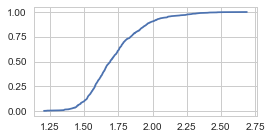

In [19]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(df['std'])
plt.plot(ecdf.x, ecdf.y)
plt_configure(figsize=(4,2))
print(ecdf(2.2))

## 3.2 Scatter

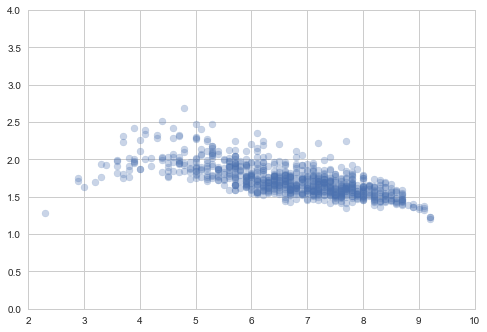

In [20]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(df.db_rating, df['std'], alpha=0.3)
ax.axis([2,10,0,4])
plt.show()
turn_scatter_into_interactive(fig, scatter_plot, df, 'D:/movie_output/popular.html', show_ratings_num=False, click=True)

## 3.3 Cluster analysis

In [21]:
from sklearn.cluster import KMeans
X = df[['1_star','2_star','3_star','4_star','5_star']].as_matrix()

n_clusters = 6
kmeans_model = KMeans(n_clusters=n_clusters, random_state=1).fit(X)

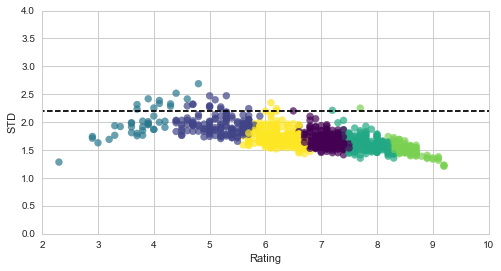

In [22]:
df['cluster'] = kmeans_model.labels_
fig, ax = plt.subplots()
scatter_plot = ax.scatter(df['db_rating'], df['std'], c=df['cluster'], alpha=0.7, cmap='viridis')
ax.axis([2,10,0,4])
plt.plot([0,10],[2.2,2.2], linestyle='--', color='black', label='0.96')
plt_configure(xlabel='Rating', ylabel='STD')
plt.gca().set_aspect('equal')
plt.show()

turn_scatter_into_interactive(fig, scatter_plot, df, 'D:\movie_output\clusters.html', show_ratings_num=False, click=True, show_distribution=True)

### 3.3.1 Cross validation of the number of clustering

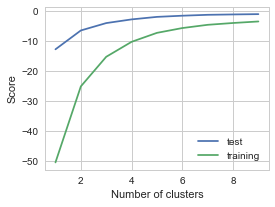

In [23]:
from sklearn.model_selection import GridSearchCV

cluster_range = arange(1,10)
grid = GridSearchCV(KMeans(random_state=1), {'n_clusters': cluster_range}, cv=5, n_jobs=-1) 
grid.fit(X)

plt.plot(cluster_range, grid.cv_results_['mean_test_score'], label='test')
plt.plot(cluster_range, grid.cv_results_['mean_train_score'], label='training')
plt_configure(figsize=(4,3), xlabel='Number of clusters', ylabel='Score', legend=True)

### 3.3.2 Cluster centroids

In [24]:
def prettyfloat(float):
    return "%0.1f" % float

In [25]:
vmin, vmax = df['cluster'].min(), df['cluster'].max()
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cmap = mpl.cm.get_cmap('viridis')
colors = cmap(norm(arange(vmin, vmax+1)))

In [26]:
x=arange(1,6) # 5 rating types
for cluster, color in zip(kmeans_model.cluster_centers_, colors):
    plt.figure()
    rating_avg=np.dot(cluster, arange(2,12,2))
    plt.bar(x, cluster, alpha=0.7, color=color)
    plt.ylim([0,0.5*1.1])
    plt_configure(title='Rating: '+prettyfloat(rating_avg), figsize=(3.5,2.5))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOYAAAC4CAYAAAD37pA8AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAD3hJREFUeJzt3WtMk2cfBvAL2lWx6NCAy5JFo4gu8xBBY2LQ4Qk1MJAJ
S1HWssgiW+JwylAkEetwCEHd8gpodHMeooHNEYIG51Q6zSAyheBUFBZEhsw5UBstFUtp3w/ETifS
Slt6j16/T9I+h0vIxdPDzb8eZrPZDCISiqerAxDR81hMIgGxmEQCYjGJBMRiEgmIxSQSkNTVAdzB
vHnz0NLS8sxtQ4YMwZtvvol169YhMDDQpuO0t7ejtLQU7733HgAgNTUVer0e//vf/xye+d+USiV+
/fXX525/4403cObMmV73/eOPPxAZGYny8nLI5XJnRRxQPPg+pvPNmzcPCoUCS5cuBQCYzWb89ddf
2LFjB65du4YzZ87A29vb6nFyc3NRVlaGoqIiAMDDhw9hNpsxbNgwp+YHAK1Wi87OTsvXra2tiIuL
Q3JyMt5///0X7nfr1i0kJCTg5s2bqK6uZjFtxIey/UQul8PPzw9+fn4YOXIkpkyZgqysLGi1WlRW
Vtp0jH//Dh06dGi/lBIAfHx8LPn9/PyQm5uLwMDAXkt57NgxREdHw8vLq18yDiQspgvJZDIAgEQi
AQDo9Xqo1WrMmjULEydOREhICHbv3g0AKCoqQm5uLq5evYoJEybg1q1bSE1NRVJSkuX+pUuXYu/e
vQgODsbUqVORnJwMvV5vOV9paSkWLVqEKVOmIDExEVu2bEFqaiqA7ivbhAkTLFfj3ly8eBFnz55F
Wlpar9tpNBqkpKRgw4YNL//NcXN8juki9+7dwxdffAE/Pz9Mnz4dALB161ZcvnwZ+fn5GD58OE6e
PImcnBy8/fbbCAsLw++//46Kigp8/fXXGDFixHPHrK+vx2uvvYYDBw6gpaUFSUlJmDx5Mj744ANU
V1cjJSUF69atw+zZs1FcXIw9e/YgKioKAPD666/jl19+wdChQ61m37VrFxYvXoxx48b1ut2OHTsA
wOZHBPQPFrOfZGVlYfv27QAAk8mErq4uTJ8+Hd9++63l+WVQUBBiY2MxceJEAMCHH36IvLw81NfX
46233sKQIUMgkUjg5+fX4zk6OzuRkZEBX19fjBs3DrNnz8bly5cBAIcPH8bcuXMRHx8PAFi7di3O
nz9v2be34z6tqakJ5eXlOHr0aN+/GWQVi9lPEhMTERkZCYPBgCNHjuDUqVNYtWoVAgICLNtERUVB
o9GgpKQEjY2NuHbtGvR6PUwmk03nkMvl8PX1tXzt7e1teShbV1eHiIiIZ7afOnUqHjx48FL/jxMn
TsDf3x+TJk16qf3o5fA5Zj8ZPnw4Ro8ejYCAAGzatAnTpk3Dxx9/jNu3b1u2SUtLg1qtxqBBg7Bk
yRIUFBS81Is7r7zyygvvk0qlNhe8N2fPnkVoaKjdx6HesZgusmnTJkgkEqjVagDA/fv3UVRUhOzs
bKxduxbh4eGQyWSWt0QAwMPDo8/nCwgIwNWrV5+57cnDXFsZjUZcuXIFM2bM6HMOsg2L6SIjRoxA
cnIyfv75Z5w+fRre3t6Qy+U4deoUmpubUVVVhU8++QRmsxkGgwFA96KEtrY2NDc3w2g0vtT5VCoV
NBoNDh48iJs3byI3NxfV1dWWsnd1daG1tRUdHR0vPEZjYyMMBkOPL/rYsj/ZjsV0oZiYGAQGBiIz
MxNGoxHbt29HRUUFwsPDsX79egQHByMkJMRypVu0aBHkcjnCwsJQW1v7UueaPHkyMjMzsX//fkRE
RKC2thbz58+3PPy9ffs2Zs2ahdLS0hceo62tDUD3e5r/Zsv+ZDuu/HETv/32G+RyOfz9/S23rVy5
ElOmTMGqVatcmIx6wiumm6ipqUFCQgIuXLiAlpYWFBYW4vz581i4cKGro1EPeMV0E0ajEdu2bcPx
48fx4MED+Pv7Y/Xq1ZgzZ46ro1EPWEwiAfGhLJGAWEwiAbGYRALq97WyVVVV/X1KIqFNmzbtudtc
soi9pyCOUlVV5dTj9wUz2cYdM73oQsWHskQCYjGJBMRiEgmIxSQSEItJJCAWk0hALCaRgKy+j2ky
maBWq1FXVweZTIYtW7Zg9OjRlvv379+P77//3jJOcfPmzRg7dqzzEhO5AavFPH36NAwGAwoLC1FT
U4OsrCzs2rXLcv+VK1eQnZ3NqWlEDmS1mFVVVZg9ezaA7nGHV65ceeb+q1evYs+ePWhtbcWcOXOQ
mJjonKREbsRqMXU63TMfeCORSGA0GiGVdu8aHh6O5cuXw9vbG6tWrYJGo8HcuXN7Paaz18uKuB6X
mWzDTN2sFtPb2xvt7e2Wr00mk6WUZrMZ8fHxlrH6ISEhqK2ttVpMrpV1PWayjbBrZYOCgnDu3DkA
3XNjxo8fb7lPp9PhnXfeQXt7O8xmMyorK/lck8gBrF4xQ0NDUV5ejtjYWJjNZmRmZuLYsWPQ6/VQ
KBRYs2YNVCoVZDIZZs6ciZCQkP7ITTSgWS2mp6cnPv/882due3oEYlRUlOUTo4jIMbjAgEhALCaR
gFhMIgGxmEQCYjGJBMRiEgmIxSQSEItJJCAWk0hALCaRgFhMIgGxmEQCYjGJBMRiEgmIxSQSEItJ
JCAWk0hAVotpMpmQnp4OhUIBpVKJpqamHrfbuHEjtm3b5vCARO7IajGfHvicnJyMrKys57YpKChA
fX29UwISuSO7Bz5XV1fj0qVLUCgUuHHjhnNSUo82Rj7/S9JWWq0WxT6n+rRvRklqn89LtrFr4PPf
f/+NvLw85Obm4sSJEzaflAOfHUOr1bpkf2d+f93lZ2eNXQOff/zxR9y/fx8rV65Ea2srOjo6MHbs
WCxdurTXY3Lgs2P09YoHdJfSx8enT/s66/vrTj+7p4/fE6vFDAoKgkajQVhY2HMDn1UqFVQqFQCg
qKgIN27csFpKIrLO7oHPRE/j817HsHvg8xO8UhI5DhcYEAmIxSQSEItJJCAWk0hALCaRgFhMIgGx
mEQCYjGJBMRiEgmIxSQSEItJJCAWk0hALCaRgFhMIgGxmEQCYjGJBGT3XNmTJ08iOjoaMTExOHDg
gNOCErkTu+bKdnV1Yfv27di/fz8KCwtx5MgR3Lt3z6mBidyBXXNlJRIJSktLIZVKcffuXZhMJshk
MuelJXITVq+YL5or+4RUKsVPP/2EJUuWYMaMGfDy8nJOUiI3Ytdc2ScWLlyIBQsWIDU1FcXFxYiO
ju71mBz47BgiDnwWMZO9hBz43NtcWZ1Oh48++gj79u2DTCaDl5cXPD2tv9DLgc+OIeLAZxEz2UPY
gc/W5spGREQgLi4OUqkUEyZMQGRkpMPDE7kbu+fKKhQKDn4mcjAuMCASEItJJCAWk0hALCaRgFhM
IgGxmEQCYjGJBMRiEgmIxSQSEItJJCAWk0hALCaRgFhMIgGxmEQCYjGJBMRiEgmIxSQSkNUJBiaT
CWq1GnV1dZDJZNiyZQtGjx5tuf/48eM4cOAAJBIJxo8fD7VabdPcHyJ6MbsGPnd0dOCrr77CwYMH
UVBQAJ1OB41G49TARO7AajF7G/gsk8lQUFBgmSVrNBoxaNAgJ0Ulch9WH8q+aOCzVCqFp6cnfH19
AQCHDh2CXq9HcHCw1ZNyrqxjiDjDVcRM9hJyrqy1gc8mkwk5OTlobGzEzp074eHhYfWknCvrGCLO
cBUxkz1cNVfW6kPZoKAgnDt3DgCeG/gMAOnp6Xj8+DHy8/P58QhEDmLXwOdJkybh6NGjmD59OuLj
4wEAKpUKoaGhTg9ONJDZPfD5+vXrjk9F5Ob4hiORgFhMIgGxmEQCYjGJBMRiEgmIxSQSEItJJCAW
k0hALCaRgFh

## 3.3 Big deviation movies

In [27]:
movie_list(df.sort_values(by='std',ascending=False), len=30)

## 3.4 Misc analysis

In [28]:
# sub_df = df[df['name'].str.contains("西游")]
# movie_list(sub_df.sort_values(by='std',ascending=False))

In [29]:
df[df['name'].str.contains("大话天仙")]

,1_star,2_star,3_star,4_star,5_star,movie_tt_id,image_url,db_rating,db_ratings_count,name,douban_url,year,mode,std,std2,cluster
1378,0.661,0.231,0.081,0.012,0.015,,https://img3.doubanio.com/view/movie_poster_co...,3.0,23184,大话天仙,https://movie.douban.com/subject/4913222/,2014,2,1.629724,1.900526,2


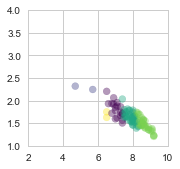

In [30]:
sub_df = df.query("db_ratings_count > 200000")
fig, ax = plt.subplots()
scatter_plot = ax.scatter(sub_df['db_rating'], sub_df['std'], c=sub_df['cluster'], alpha=0.4, cmap='viridis')
ax.axis([2,10,1,4])
plt_configure(figsize=(2.5,2.5))
plt.show()
turn_scatter_into_interactive(fig, scatter_plot, sub_df, 'D:\movie_output\clusters2.html', show_ratings_num=False, click=True)